In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sn
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
sales =pd.read_csv('C:\\Users\\USUARIO\\Desktop\\IRONHACK\\repos\\Iron-Kaggle\\sales.csv')
sales.head(5)

,Unnamed: 0,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,425390,366,4,2013-04-18,517,1,0,0,0,4422
1,291687,394,6,2015-04-11,694,1,0,0,0,8297
2,411278,807,4,2013-08-29,970,1,1,0,0,9729
3,664714,802,2,2013-05-28,473,1,1,0,0,6513
4,540835,726,4,2013-10-10,1068,1,1,0,0,10882


In [3]:
# check statistics
sales.describe()

,Unnamed: 0,store_ID,day_of_week,nb_customers_on_day,open,promotion,school_holiday,sales
count,640840.000000,640840.000000,640840.000000,640840.000000,640840.000000,640840.000000,640840.000000,640840.000000
mean,355990.675084,558.211348,4.000189,633.398577,0.830185,0.381718,0.178472,5777.469011
std,205536.290268,321.878521,1.996478,464.094416,0.375470,0.485808,0.382910,3851.338083
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,178075.750000,280.000000,2.000000,405.000000,1.000000,0.000000,0.000000,3731.000000
50%,355948.500000,558.000000,4.000000,609.000000,1.000000,0.000000,0.000000,5746.000000
75%,533959.250000,837.000000,6.000000,838.000000,1.000000,1.000000,0.000000,7860.000000
max,712044.000000,1115.000000,7.000000,5458.000000,1.000000,1.000000,1.000000,41551.000000


In [4]:
sales.shape

(640840, 10)

In [5]:
# check the data types
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640840 entries, 0 to 640839
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Unnamed: 0           640840 non-null  int64 
 1   store_ID             640840 non-null  int64 
 2   day_of_week          640840 non-null  int64 
 3   date                 640840 non-null  object
 4   nb_customers_on_day  640840 non-null  int64 
 5   open                 640840 non-null  int64 
 6   promotion            640840 non-null  int64 
 7   state_holiday        640840 non-null  object
 8   school_holiday       640840 non-null  int64 
 9   sales                640840 non-null  int64 
dtypes: int64(8), object(2)
memory usage: 48.9+ MB


In [6]:
filtered_sales = sales[(sales['open'] == 0) & (sales['nb_customers_on_day'] != 0)]
filtered_sales.head(10)

,Unnamed: 0,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales


In [7]:
# # Filter the data to keep only the days when the store is open
# sales = sales[sales['open'] == 1]


# # Remove the 'open' column
# sales.drop(columns=['open'], inplace=True)

In [8]:
# Drop the Unnamed column
sales.drop(columns=['Unnamed: 0'], inplace=True)
sales

,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,366,4,2013-04-18,517,1,0,0,0,4422
1,394,6,2015-04-11,694,1,0,0,0,8297
2,807,4,2013-08-29,970,1,1,0,0,9729
3,802,2,2013-05-28,473,1,1,0,0,6513
4,726,4,2013-10-10,1068,1,1,0,0,10882
...,...,...,...,...,...,...,...,...,...
640835,409,6,2013-10-26,483,1,0,0,0,4553
640836,97,1,2014-04-14,987,1,1,0,0,12307
640837,987,1,2014-07-07,925,1,0,0,0,6800
640838,1084,4,2014-06-12,725,1,0,0,0,5344


In [9]:
# Define the function to assign values to the is_holiday column
def is_holiday(row):
    if row['state_holiday'] == '0':
        return 0
    else:
        return 1

# Apply the function to the state_holiday column to create the is_holiday column
sales['is_holiday'] = sales.apply(is_holiday, axis=1)

# Check the first few records to ensure the column was added correctly
print(sales.head())

   store_ID  day_of_week        date  nb_customers_on_day  open  promotion  \
0       366            4  2013-04-18                  517     1          0   
1       394            6  2015-04-11                  694     1          0   
2       807            4  2013-08-29                  970     1          1   
3       802            2  2013-05-28                  473     1          1   
4       726            4  2013-10-10                 1068     1          1   

  state_holiday  school_holiday  sales  is_holiday  
0             0               0   4422           0  
1             0               0   8297           0  
2             0               0   9729           0  
3             0               0   6513           0  
4             0               0  10882           0  


In [10]:
# check the data types
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640840 entries, 0 to 640839
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   store_ID             640840 non-null  int64 
 1   day_of_week          640840 non-null  int64 
 2   date                 640840 non-null  object
 3   nb_customers_on_day  640840 non-null  int64 
 4   open                 640840 non-null  int64 
 5   promotion            640840 non-null  int64 
 6   state_holiday        640840 non-null  object
 7   school_holiday       640840 non-null  int64 
 8   sales                640840 non-null  int64 
 9   is_holiday           640840 non-null  int64 
dtypes: int64(8), object(2)
memory usage: 48.9+ MB


In [11]:
# Check for missing values in each column
missing_values = sales.isnull().sum()
missing_values

store_ID               0
day_of_week            0
date                   0
nb_customers_on_day    0
open                   0
promotion              0
state_holiday          0
school_holiday         0
sales                  0
is_holiday             0
dtype: int64

In [12]:
original_df_sales = sales.copy()

In [13]:
original_df_sales['state_holiday'].value_counts()

state_holiday
0    621160
a     12842
b      4214
c      2624
Name: count, dtype: int64

In [14]:
# Apply One-Hot Encoding to the 'state_holiday' column and drop the first encoded column
sales_transformed = pd.merge(left=sales,
                             right=pd.get_dummies(sales['state_holiday'], prefix='state_holiday', drop_first=True),
                             left_index=True,
                             right_index=True)

# Display the first few rows of the resulting DataFrame
sales_transformed.head()

,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales,is_holiday,state_holiday_a,state_holiday_b,state_holiday_c
0,366,4,2013-04-18,517,1,0,0,0,4422,0,False,False,False
1,394,6,2015-04-11,694,1,0,0,0,8297,0,False,False,False
2,807,4,2013-08-29,970,1,1,0,0,9729,0,False,False,False
3,802,2,2013-05-28,473,1,1,0,0,6513,0,False,False,False
4,726,4,2013-10-10,1068,1,1,0,0,10882,0,False,False,False


In [15]:
sales_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640840 entries, 0 to 640839
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   store_ID             640840 non-null  int64 
 1   day_of_week          640840 non-null  int64 
 2   date                 640840 non-null  object
 3   nb_customers_on_day  640840 non-null  int64 
 4   open                 640840 non-null  int64 
 5   promotion            640840 non-null  int64 
 6   state_holiday        640840 non-null  object
 7   school_holiday       640840 non-null  int64 
 8   sales                640840 non-null  int64 
 9   is_holiday           640840 non-null  int64 
 10  state_holiday_a      640840 non-null  bool  
 11  state_holiday_b      640840 non-null  bool  
 12  state_holiday_c      640840 non-null  bool  
dtypes: bool(3), int64(8), object(2)
memory usage: 50.7+ MB


In [16]:
# Convert 'date' column to datetime
sales_transformed['date'] = pd.to_datetime(sales_transformed['date'])

# Check the first few rows to verify the conversion
print(sales_transformed.head())

   store_ID  day_of_week       date  nb_customers_on_day  open  promotion  \
0       366            4 2013-04-18                  517     1          0   
1       394            6 2015-04-11                  694     1          0   
2       807            4 2013-08-29                  970     1          1   
3       802            2 2013-05-28                  473     1          1   
4       726            4 2013-10-10                 1068     1          1   

  state_holiday  school_holiday  sales  is_holiday  state_holiday_a  \
0             0               0   4422           0            False   
1             0               0   8297           0            False   
2             0               0   9729           0            False   
3             0               0   6513           0            False   
4             0               0  10882           0            False   

   state_holiday_b  state_holiday_c  
0            False            False  
1            False            Fals

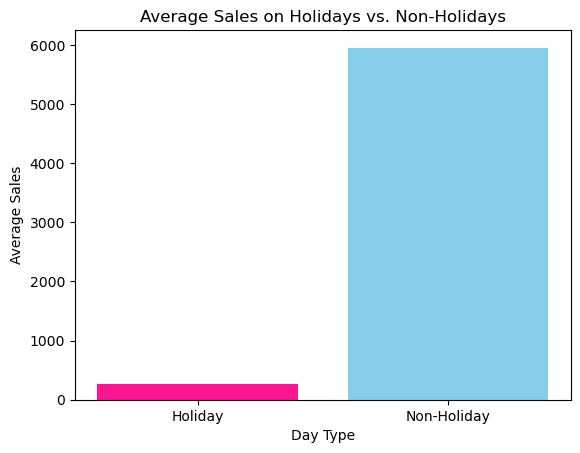

In [17]:
# Calculate the average sales on holidays and non-holidays
holiday_sales_mean = sales[sales['is_holiday'] == 1]['sales'].mean()
non_holiday_sales_mean = sales[sales['is_holiday'] == 0]['sales'].mean()

# Define colors
colors = ['#FF1493', '#87CEEB']

# Create a bar plot
plt.bar(['Holiday', 'Non-Holiday'], [holiday_sales_mean, non_holiday_sales_mean], color=colors)
plt.xlabel('Day Type')
plt.ylabel('Average Sales')
plt.title('Average Sales on Holidays vs. Non-Holidays')
plt.show()

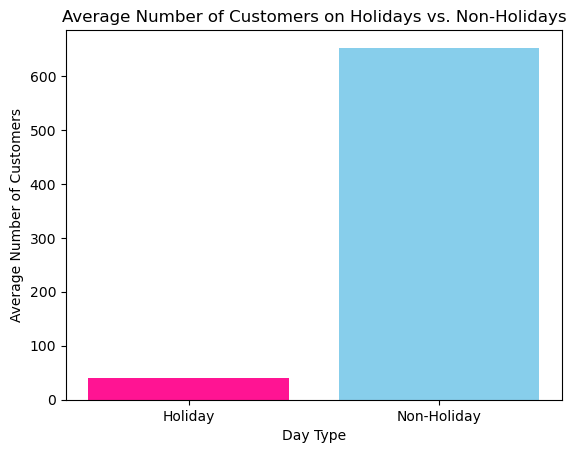

In [18]:
# Calculate the average number of customers on holidays and non-holidays
holiday_customers_mean = sales[sales['is_holiday'] == 1]['nb_customers_on_day'].mean()
non_holiday_customers_mean = sales[sales['is_holiday'] == 0]['nb_customers_on_day'].mean()

# Define colors
colors = ['#FF1493', '#87CEEB']

# Create a bar plot
plt.bar(['Holiday', 'Non-Holiday'], [holiday_customers_mean, non_holiday_customers_mean], color=colors)
plt.xlabel('Day Type')
plt.ylabel('Average Number of Customers')
plt.title('Average Number of Customers on Holidays vs. Non-Holidays')
plt.show()

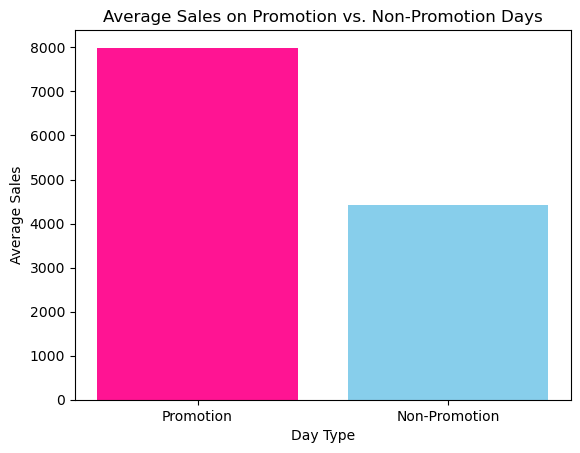

In [19]:
# Calculate the average sales on promotion days and non-promotion days
promotion_sales_mean = sales[sales['promotion'] == 1]['sales'].mean()
non_promotion_sales_mean = sales[sales['promotion'] == 0]['sales'].mean()

# Define colors
colors = ['#FF1493', '#87CEEB']

# Create a bar plot
plt.bar(['Promotion', 'Non-Promotion'], [promotion_sales_mean, non_promotion_sales_mean], color=colors)
plt.xlabel('Day Type')
plt.ylabel('Average Sales')
plt.title('Average Sales on Promotion vs. Non-Promotion Days')
plt.show()

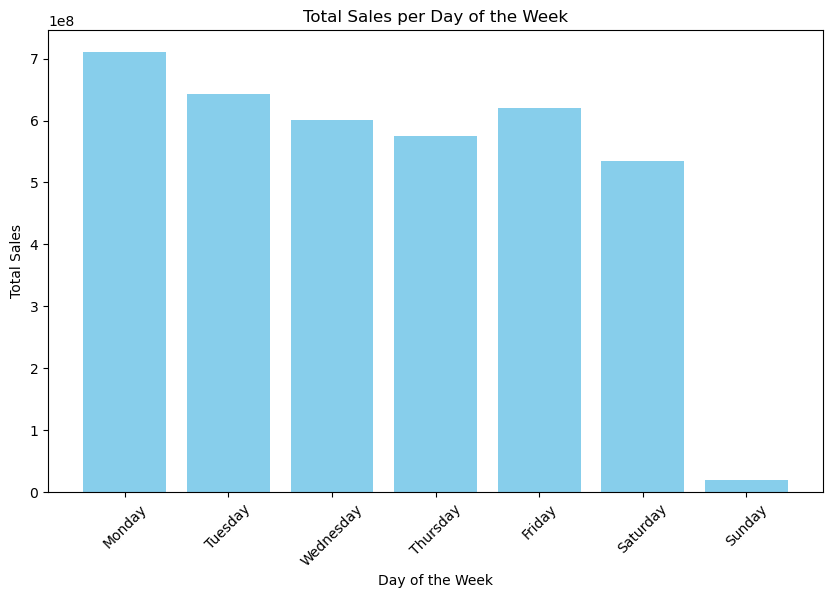

In [20]:
# Calculate total sales for each day of the week
total_sales_per_day = sales.groupby('day_of_week')['sales'].sum()

# Define the days of the week and their labels
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create a bar plot
plt.figure(figsize=(10, 6))  # Increase the size of the plot
plt.bar(days_of_week, total_sales_per_day, color='skyblue')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.title('Total Sales per Day of the Week')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [21]:
# Create a new column indicating whether the day is Sunday (1) or not (0)
sales_transformed['is_sunday'] = (sales_transformed['day_of_week'] == 7).astype(int)

# Display the first few rows to verify
sales_transformed.head()

,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales,is_holiday,state_holiday_a,state_holiday_b,state_holiday_c,is_sunday
0,366,4,2013-04-18,517,1,0,0,0,4422,0,False,False,False,0
1,394,6,2015-04-11,694,1,0,0,0,8297,0,False,False,False,0
2,807,4,2013-08-29,970,1,1,0,0,9729,0,False,False,False,0
3,802,2,2013-05-28,473,1,1,0,0,6513,0,False,False,False,0
4,726,4,2013-10-10,1068,1,1,0,0,10882,0,False,False,False,0


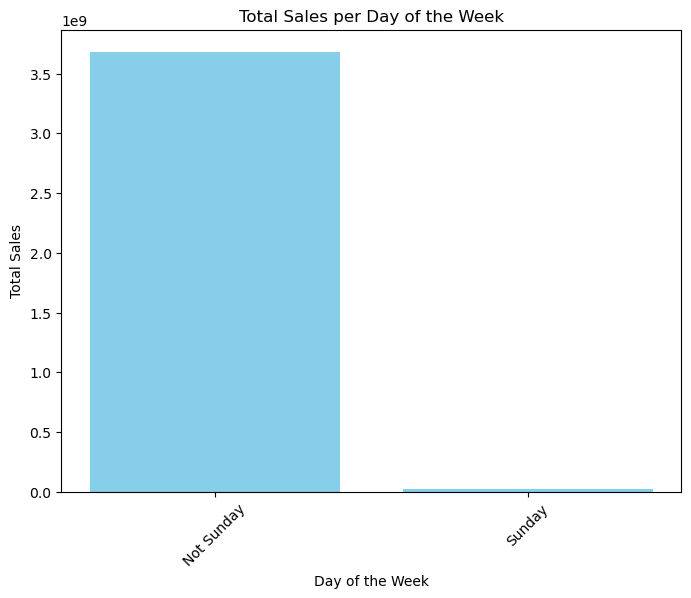

In [22]:
# Calculate total sales for each day of the week
total_sales_per_day = sales_transformed.groupby('is_sunday')['sales'].sum()

# Define the days of the week and their labels
days_of_week = ['Not Sunday', 'Sunday']

# Create a bar plot
plt.figure(figsize=(8, 6))  # Increase the size of the plot
plt.bar(days_of_week, total_sales_per_day, color='skyblue')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.title('Total Sales per Day of the Week')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [23]:
# Create a new column indicating whether the day is Sunday (1) or not (0)
sales['is_sunday'] = (sales['day_of_week'] == 7).astype(int)

# Display the first few rows to verify
print(sales.head())

   store_ID  day_of_week        date  nb_customers_on_day  open  promotion  \
0       366            4  2013-04-18                  517     1          0   
1       394            6  2015-04-11                  694     1          0   
2       807            4  2013-08-29                  970     1          1   
3       802            2  2013-05-28                  473     1          1   
4       726            4  2013-10-10                 1068     1          1   

  state_holiday  school_holiday  sales  is_holiday  is_sunday  
0             0               0   4422           0          0  
1             0               0   8297           0          0  
2             0               0   9729           0          0  
3             0               0   6513           0          0  
4             0               0  10882           0          0  


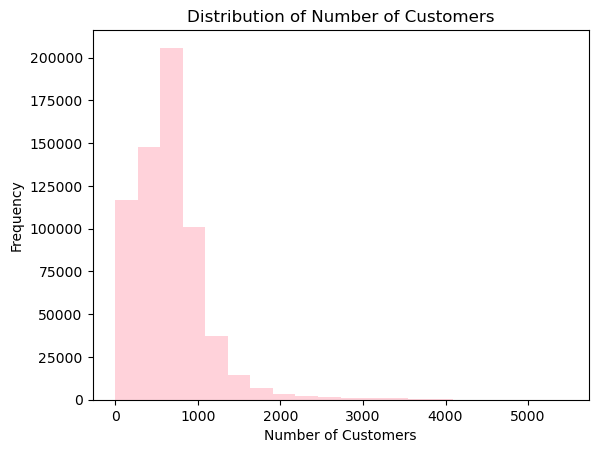

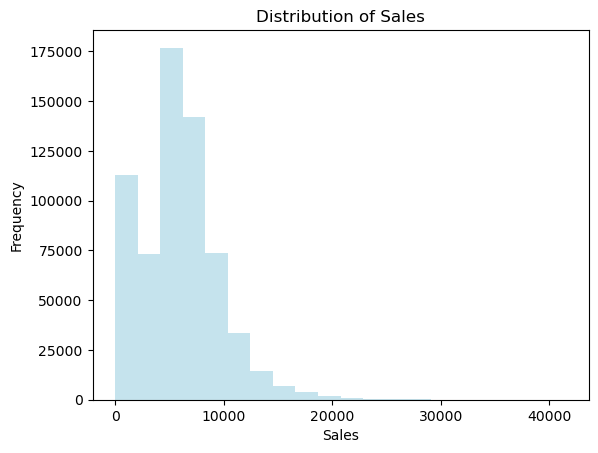

In [24]:
# Plot histogram for numeric variables
plt.hist(sales['nb_customers_on_day'], bins=20, color='pink', alpha=0.7)
plt.title('Distribution of Number of Customers')
plt.xlabel('Number of Customers')
plt.ylabel('Frequency')
plt.show()

plt.hist(sales['sales'], bins=20, color='lightblue', alpha=0.7)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

In [25]:
print(sales_transformed.dtypes)

store_ID                        int64
day_of_week                     int64
date                   datetime64[ns]
nb_customers_on_day             int64
open                            int64
promotion                       int64
state_holiday                  object
school_holiday                  int64
sales                           int64
is_holiday                      int64
state_holiday_a                  bool
state_holiday_b                  bool
state_holiday_c                  bool
is_sunday                       int32
dtype: object


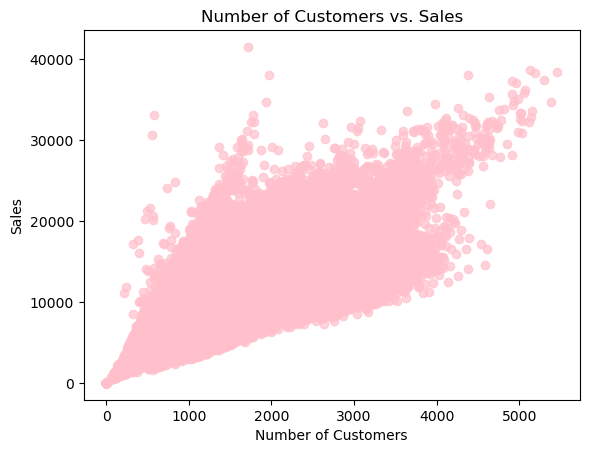

In [26]:
# Plot scatter plots for relationships between variables
plt.scatter(sales['nb_customers_on_day'], sales['sales'], color='pink', alpha=0.7)
plt.title('Number of Customers vs. Sales')
plt.xlabel('Number of Customers')
plt.ylabel('Sales')
plt.show()

In [27]:
sales_transformed.columns

Index(['store_ID', 'day_of_week', 'date', 'nb_customers_on_day', 'open',
       'promotion', 'state_holiday', 'school_holiday', 'sales', 'is_holiday',
       'state_holiday_a', 'state_holiday_b', 'state_holiday_c', 'is_sunday'],
      dtype='object')

In [28]:
# Remove the 'state_holiday' column
sales_transformed.drop(columns=['state_holiday'], inplace=True)

# Calculate the correlation matrix
correlation_matrix = sales_transformed.corr()

# Display the correlation matrix
print(correlation_matrix)

                     store_ID  day_of_week      date  nb_customers_on_day  \
store_ID             1.000000     0.000329  0.000149             0.023605   
day_of_week          0.000329     1.000000  0.000785            -0.385616   
date                 0.000149     0.000785  1.000000             0.011718   
nb_customers_on_day  0.023605    -0.385616  0.011718             1.000000   
open                -0.001108    -0.527947 -0.000078             0.617264   
promotion           -0.000364    -0.392736  0.017380             0.315858   
school_holiday      -0.000706    -0.206069  0.000357             0.071085   
sales                0.004804    -0.461107  0.041123             0.894872   
is_holiday           0.000503    -0.053206  0.003263            -0.227339   
state_holiday_a      0.001005    -0.041343 -0.000843            -0.182142   
state_holiday_b      0.000016    -0.040759 -0.002708            -0.103493   
state_holiday_c     -0.000866    -0.001438  0.014095            -0.083525   

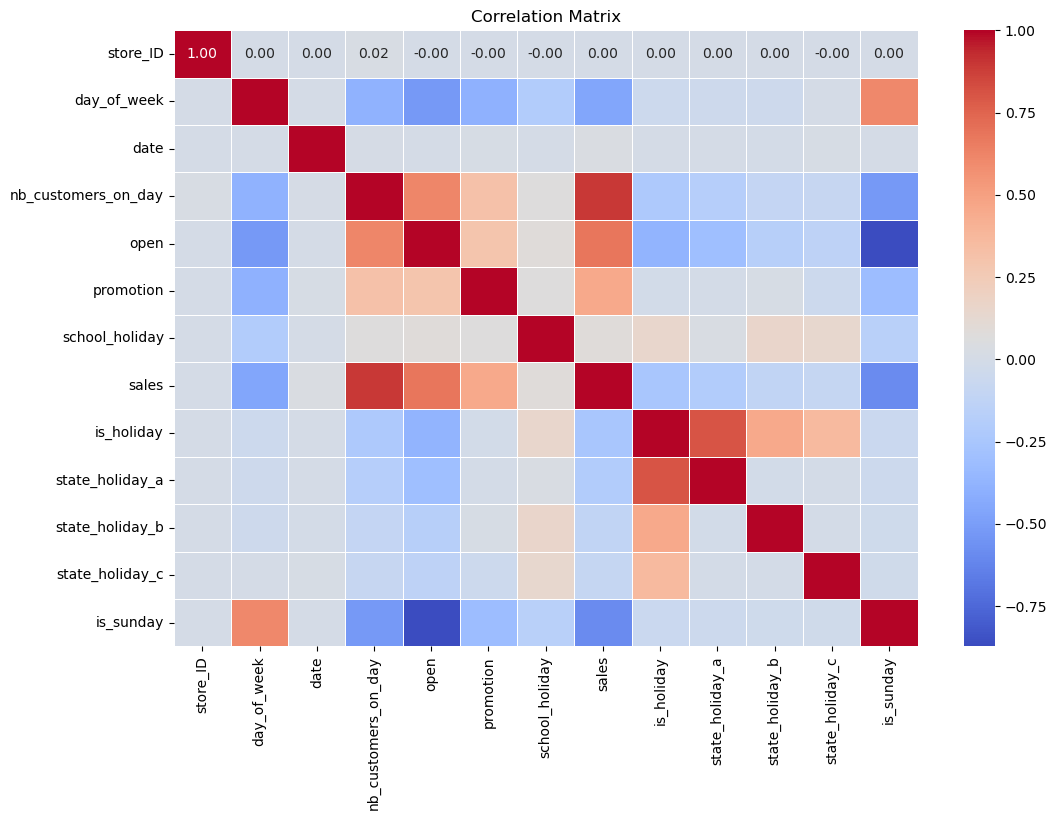

In [29]:
# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sn.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [30]:
sales_transformed.head()

,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,school_holiday,sales,is_holiday,state_holiday_a,state_holiday_b,state_holiday_c,is_sunday
0,366,4,2013-04-18,517,1,0,0,4422,0,False,False,False,0
1,394,6,2015-04-11,694,1,0,0,8297,0,False,False,False,0
2,807,4,2013-08-29,970,1,1,0,9729,0,False,False,False,0
3,802,2,2013-05-28,473,1,1,0,6513,0,False,False,False,0
4,726,4,2013-10-10,1068,1,1,0,10882,0,False,False,False,0


In [31]:
# Convert the 'date' column to datetime type
sales_transformed['date'] = pd.to_datetime(sales_transformed['date'])

# Creating a new column for the month
sales_transformed['month'] = sales_transformed['date'].dt.month
sales_transformed

,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,school_holiday,sales,is_holiday,state_holiday_a,state_holiday_b,state_holiday_c,is_sunday,month
0,366,4,2013-04-18,517,1,0,0,4422,0,False,False,False,0,4
1,394,6,2015-04-11,694,1,0,0,8297,0,False,False,False,0,4
2,807,4,2013-08-29,970,1,1,0,9729,0,False,False,False,0,8
3,802,2,2013-05-28,473,1,1,0,6513,0,False,False,False,0,5
4,726,4,2013-10-10,1068,1,1,0,10882,0,False,False,False,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640835,409,6,2013-10-26,483,1,0,0,4553,0,False,False,False,0,10
640836,97,1,2014-04-14,987,1,1,0,12307,0,False,False,False,0,4
640837,987,1,2014-07-07,925,1,0,0,6800,0,False,False,False,0,7
640838,1084,4,2014-06-12,725,1,0,0,5344,0,False,False,False,0,6


In [32]:
# Select features and target variable

X = sales_transformed[['nb_customers_on_day', 'store_ID', 'promotion', 'is_holiday', 'is_sunday' , 'open']]
y = sales_transformed['sales']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#scaler = StandardScaler()
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[['nb_customers_on_day' , 'promotion', 'is_holiday', 'is_sunday' , 'open' ]] = scaler.fit_transform(X_train[['nb_customers_on_day' , 'promotion', 'is_holiday', 'is_sunday' , 'open' ]])
X_test_scaled[['nb_customers_on_day' , 'promotion', 'is_holiday', 'is_sunday' , 'open' ]] = scaler.transform(X_test[['nb_customers_on_day' , 'promotion', 'is_holiday', 'is_sunday' , 'open' ]])

In [33]:
# # Create and train the linear regression model
# model = LinearRegression()
# model.fit(X_train_scaled, y_train)

# # Make predictions
# predictions = model.predict(X_test_scaled)

# # Evaluate the model performance
# r2 = r2_score(y_test, predictions)
# mse = mean_squared_error(y_test, predictions)
# print("R² Score:", r2)
# print("Mean Squared Error:", mse)

In [34]:
# # Create and train the XGBoost model
# xgb_model = XGBRegressor()
# xgb_model.fit(X_train_scaled, y_train)

# # Make predictions
# xgb_predictions = xgb_model.predict(X_test_scaled)

# # Evaluate the model performance
# xgb_r2 = r2_score(y_test, xgb_predictions)
# xgb_mse = mean_squared_error(y_test, xgb_predictions)
# print("XGBoost R² Score:", xgb_r2)
# print("XGBoost Mean Squared Error:", xgb_mse)

### Random Forest

In [35]:
# Create and train the Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test_scaled)

# Evaluate the performance of the Random Forest model
rf_r2 = r2_score(y_test, rf_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)
print("Random Forest R² Score:", rf_r2)
print("Random Forest Mean Squared Error:", rf_mse)

Random Forest R² Score: 0.9728068602681728
Random Forest Mean Squared Error: 401959.78189405525


In [36]:
# # Create and train the Gradient Boosting model
# gb_model = GradientBoostingRegressor(random_state=42)
# gb_model.fit(X_train_scaled, y_train)

# # Make predictions
# gb_predictions = gb_model.predict(X_test_scaled)

# # Evaluate the performance of the Gradient Boosting model
# gb_r2 = r2_score(y_test, gb_predictions)
# gb_mse = mean_squared_error(y_test, gb_predictions)
# print("Gradient Boosting R² Score:", gb_r2)
# print("Gradient Boosting Mean Squared Error:", gb_mse)

### Pickle

In [37]:
predicciones_rf = rf_model.predict(X_test_scaled)

# Calcular el error cuadrático medio
mse_rf = mean_squared_error(y_test, predicciones_rf)
print("Mean Squared Error (Random Forest):", mse_rf)

# Calcular y_test_pred
y_test_pred = rf_model.predict(X_test_scaled)

Mean Squared Error (Random Forest): 401959.78189405525


In [39]:
y_test_pred

array([ 9615.1025    ,     0.        ,  4781.08770455, ...,
       10686.796     ,  8257.54      ,  8207.848     ])

In [40]:
import pickle

ruta_rf_model = 'C:\\Users\\USUARIO\\Desktop\\IRONHACK\\repos\\Iron-Kaggle\\rf_model.pkl'

pickle.dump(rf_model, open(ruta_rf_model, 'wb'))

ruta_scaler = 'C:\\Users\\USUARIO\\Desktop\\IRONHACK\\repos\\Iron-Kaggle\\rf_model.pkl'

pickle.dump(scaler, open(ruta_scaler, 'wb'))

ruta_X_test = 'C:\\Users\\USUARIO\\Desktop\\IRONHACK\\repos\\Iron-Kaggle\\rf_model.pkl'

with open(ruta_X_test, 'wb') as f:
    pickle.dump(X_test, f)

ruta_y_test_pred = 'C:\\Users\\USUARIO\\Desktop\\IRONHACK\\repos\\Iron-Kaggle\\rf_model.pkl'

with open(ruta_y_test_pred, 'wb') as f:
    pickle.dump(y_test_pred, f)